
# Taller de Sesgo y Sentimiento en Tweets 🐦

En este taller aplicarás el flujo completo de análisis de texto para responder **preguntas específicas** sobre un conjunto de tweets
etiquetados como `biased` o `non-biased`.


In [2]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-05-01 18:35:13--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-05-01 18:35:13--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s


## 1. Cargar y explorar la distribución de etiquetas

**Instrucciones**  
* Carga el archivo `tweets_bias.csv`.  
* Muestra un recuento y un gráfico de barras de `biased` vs `non-biased`.

**Preguntas a responder**  
1. ¿Cuántos tweets hay de cada clase?  
2. ¿Cuál es el porcentaje de `biased` sobre el total?


In [3]:
import pandas as pd, re, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter
import re
import nltk; nltk.download('stopwords'); from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
tweets = pd.read_csv('Gender_bias_spanish.csv')
tweets.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


In [5]:
tweets.value_counts('Label')

,count
Label,
non-biased,1596
biased,318


In [6]:
tweets.value_counts('Label')*100/len(tweets)

,count
Label,
non-biased,83.38558
biased,16.61442


<ipython-input-7-4fcb9db5b893>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Label', data=tweets, palette=purple_palette)


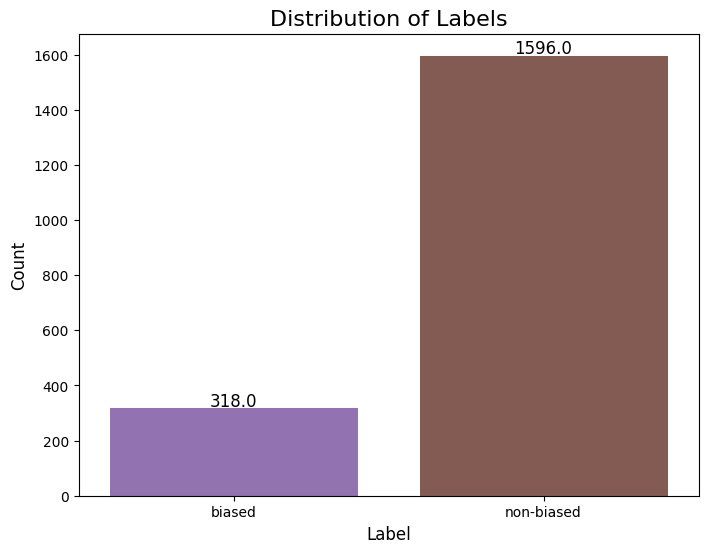

In [7]:
purple_palette = ["#9467bd", "#8c564b"]  # Example purple shades

# Create a bar plot with the custom color palette
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Label', data=tweets, palette=purple_palette)
plt.title('Distribution of Labels', fontsize=16)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')


## 2. Limpieza y normalización

**Instrucciones**  
Realiza las siguientes transformaciones sobre la columna `text`:

1. Minúsculas.  
2. Quitar tildes.  
3. Eliminar URLs, menciones (`@user`) y hashtags (#tag).  
4. Quitar caracteres no alfabéticos.  
5. Eliminar *stop‑words* en español.
6. Eliminar palabras con menos de 3 caracteres

Guarda el resultado en `clean`.

**Preguntas a responder**  
1. ¿En cuánto cambió la **longitud media** (caracteres) de los tweets tras la limpieza?  
2. ¿Cuántos tweets quedaron vacíos después de la limpieza?


In [30]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if you haven't already
nltk.download('stopwords')

# Get Spanish stopwords
spanish_stopwords = set(stopwords.words('spanish'))

def clean_text(text):
    # 1. Lowercase
    text = text.lower()
    # 2. Remove accents (This step may need further refinement depending on your specific needs)
    text = re.sub(r'[áéíóúü]', lambda m: {'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u', 'ü': 'u'}.get(m.group(0), m.group(0)), text)
    # 3. Remove URLs, mentions, and hashtags
    text = re.sub(r'http\S+|www\S+|@[^\s]+|#[^\s]+', '', text)
    # 4. Remove non-alphanumeric characters
    text = re.sub(r'[^a-zñ\s]', '', text)
    # 5. Remove Spanish stopwords
    text = ' '.join([word for word in text.split() if word not in spanish_stopwords])
    # 6. Remove words with less than 3 characters
    text = ' '.join([word for word in text.split() if len(word) >= 3])
    return text

# Apply the cleaning function to the 'Contents' column and store the result in 'clean'
tweets['clean'] = tweets['Contents'].apply(clean_text)

# Calculate average length before and after cleaning
avg_length_before = tweets['Contents'].str.len().mean()
avg_length_after = tweets['clean'].str.len().mean()

# Calculate the change in average length
change_in_length = avg_length_before - avg_length_after

# Count empty tweets after cleaning
empty_tweets_count = tweets['clean'].str.len()[tweets['clean'].str.len() == 0].count()

# Display the results
print(f"Average length before cleaning: {avg_length_before:.2f}")
print(f"Average length after cleaning: {avg_length_after:.2f}")
print(f"Cambio en la longitud media de caracteres: {change_in_length:.2f}")
print(f"Tweets vacios despues de la limpieza: {empty_tweets_count}")

Average length before cleaning: 92.62
Average length after cleaning: 51.18
Cambio en la longitud media de caracteres: 41.44
Tweets vacios despues de la limpieza: 0


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
tweets.head()

,Contents,Label,clean
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased,cabron reciben noticias colchoncito puro ching...
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased,alguien tan amable hacerme compra mañana bajon...
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased,hahaha rico nadamas falta presentacion
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased,ves programa favorito solo encuentro temporada...
4,como siempre mi tortilla triunfa mas que otros...,non-biased,siempre tortilla triunfa mas platos



## 3. Palabras características por etiqueta

**Instrucciones**  
Para cada clase (`biased` y `non-biased`):

* Calcula las 10 palabras más frecuentes y grafícalas.
* Genera una nube de palabras (colormap `plasma` para `biased`, `viridis` para `non-biased`).

**Preguntas a responder**  
1. ¿Qué palabras son exclusivas o más frecuentes en `biased`?  
2. ¿Qué diferencias de tono observas entre ambas nubes?


In [20]:
from collections import Counter
tokens=' '.join(tweets['clean']).split()
conteo=Counter(tokens)
pd.DataFrame(conteo.most_common(10),columns=['palabra','frecuencia'])

,palabra,frecuencia
0,mas,154
1,gracias,91
2,asi,83
3,solo,79
4,dia,78
5,quiero,76
6,bien,76
7,mejor,75
8,dias,73
9,ser,72


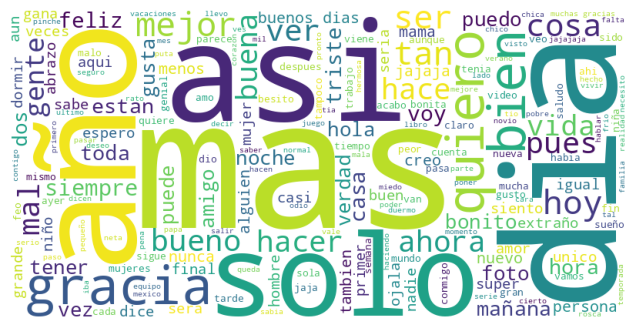

In [21]:
wc=WordCloud(width=800,height=400,background_color='white').generate(' '.join(tokens))
plt.figure(figsize=(10,4)); plt.imshow(wc); plt.axis('off'); plt.show()

In [23]:
biased_tweets = tweets[tweets['Label'] == 'biased']['clean']
non_biased_tweets = tweets[tweets['Label'] == 'non-biased']['clean']

In [24]:
from collections import Counter

def obtener_palabras_frecuentes(serie_texto, top_n=10):
    todas_palabras = ' '.join(serie_texto).split()
    conteo_palabras = Counter(todas_palabras)
    return conteo_palabras.most_common(top_n)

palabras_frecuentes_biased = obtener_palabras_frecuentes(biased_tweets)
palabras_frecuentes_non_biased = obtener_palabras_frecuentes(non_biased_tweets)
pd.DataFrame(conteo.most_common(10),columns=['palabra','frecuencia'])


,palabra,frecuencia
0,mas,154
1,gracias,91
2,asi,83
3,solo,79
4,dia,78
5,quiero,76
6,bien,76
7,mejor,75
8,dias,73
9,ser,72


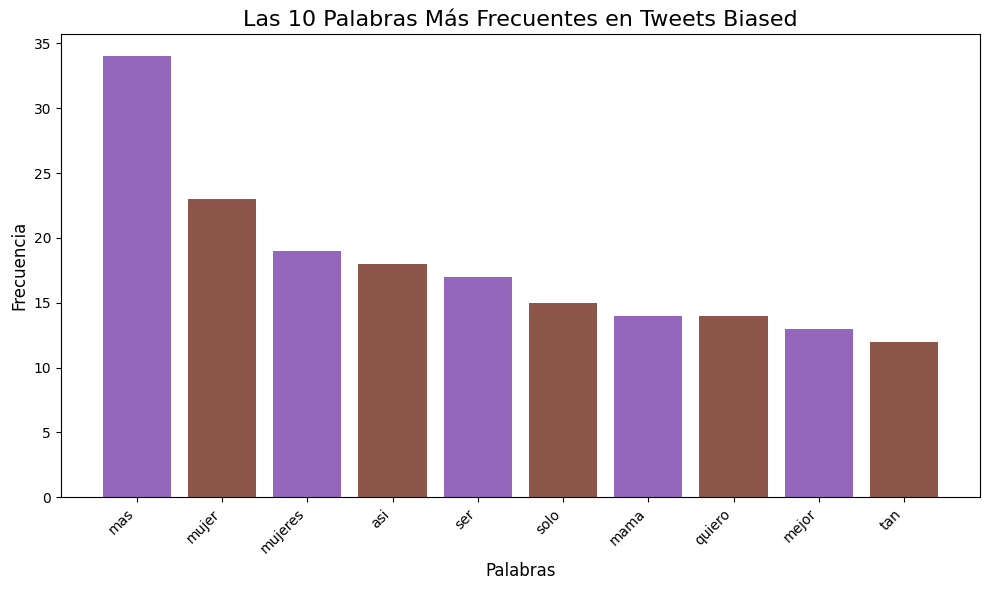

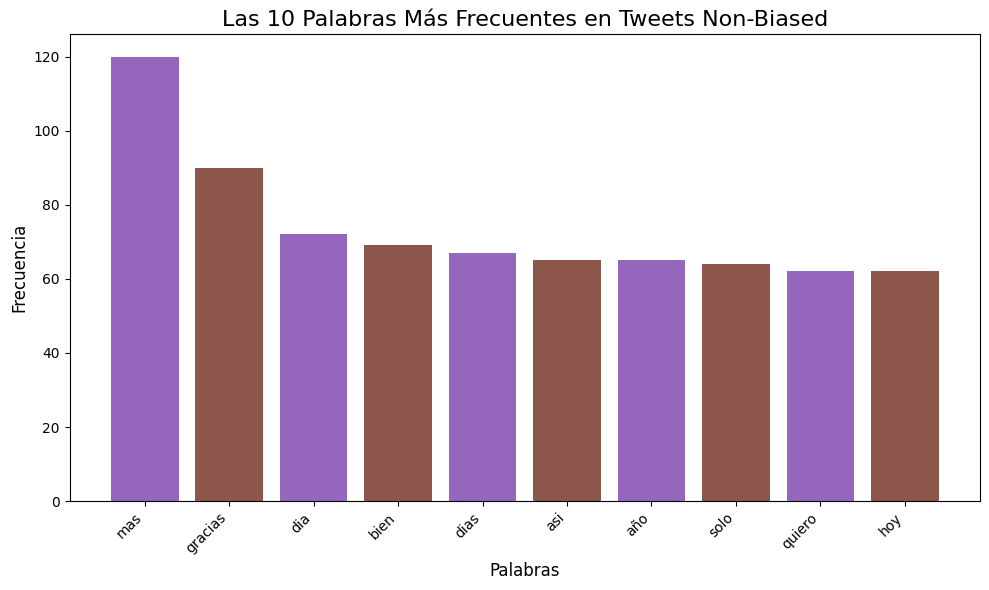

In [25]:
import matplotlib.pyplot as plt

def graficar_palabras_frecuentes(palabras_frecuentes, titulo):
    palabras, conteos = zip(*palabras_frecuentes)
    plt.figure(figsize=(10, 6))
    plt.bar(palabras, conteos, color=['#9467bd', '#8c564b'])
    plt.title(titulo, fontsize=16)
    plt.xlabel('Palabras', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

graficar_palabras_frecuentes(palabras_frecuentes_biased, 'Las 10 Palabras Más Frecuentes en Tweets Biased')
graficar_palabras_frecuentes(palabras_frecuentes_non_biased, 'Las 10 Palabras Más Frecuentes en Tweets Non-Biased')

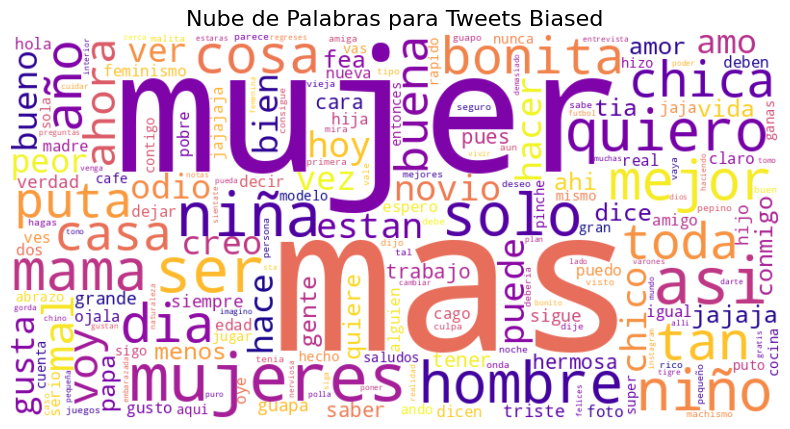

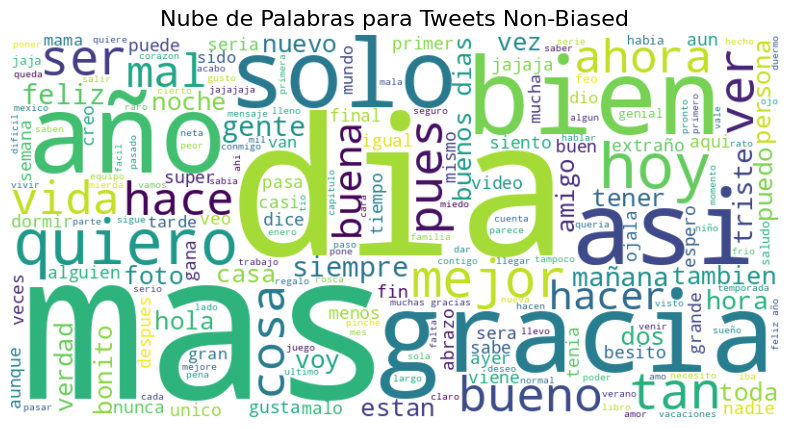

In [26]:
from wordcloud import WordCloud

def generar_nube_palabras(serie_texto, titulo, mapa_color):
    nube_palabras = WordCloud(width=800, height=400, background_color='white', colormap=mapa_color).generate(' '.join(serie_texto))
    plt.figure(figsize=(10, 5))
    plt.imshow(nube_palabras, interpolation='bilinear')
    plt.axis("off")
    plt.title(titulo, fontsize=16)
    plt.show()

generar_nube_palabras(biased_tweets, 'Nube de Palabras para Tweets Biased', 'plasma')
generar_nube_palabras(non_biased_tweets, 'Nube de Palabras para Tweets Non-Biased', 'viridis')

¿Qué diferencias de tono observas entre ambas nubes?

Las palabras non biased o insesgadas son mucho mas generales no son tan caracteristicas, mientras que las biased sesgadas hablan de caracteristicas mas puntuales, tambien se vean groserias y palabras fuera de tono


## 4. Análisis de sentimiento

**Instrucciones**  
* Calcula la polaridad con *TextBlob* para cada tweet.
* Dibuja un **histograma superpuesto** de polaridad para `biased` y `non-biased`.

**Preguntas a responder**  
1. ¿Hay diferencias significativas en la distribución de sentimiento?  
2. ¿Los tweets `biased` son, en promedio, más negativos, neutrales o positivos?


In [32]:
from textblob import TextBlob

# Calcula la polaridad para cada tweet
tweets['polarity'] = tweets['clean'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)


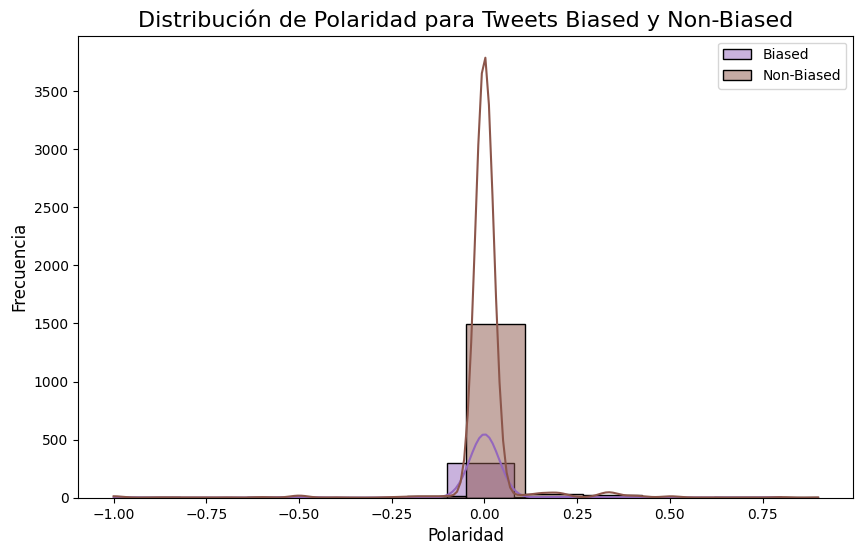

Polaridad media para tweets biased: 0.0013102725366876313
Polaridad media para tweets non-biased: 0.00467043781893406


In [33]:
# Dibuja un histograma superpuesto
plt.figure(figsize=(10, 6))
sns.histplot(tweets[tweets['Label'] == 'biased']['polarity'], color="#9467bd", label='Biased', kde=True)
sns.histplot(tweets[tweets['Label'] == 'non-biased']['polarity'], color="#8c564b", label='Non-Biased', kde=True)
plt.title('Distribución de Polaridad para Tweets Biased y Non-Biased', fontsize=16)
plt.xlabel('Polaridad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.show()

# Imprime la polaridad media para cada tipo de tweet
print('Polaridad media para tweets biased:', tweets[tweets['Label'] == 'biased']['polarity'].mean())
print('Polaridad media para tweets non-biased:', tweets[tweets['Label'] == 'non-biased']['polarity'].mean())


## 5. Hashtags y menciones más comunes

**Instrucciones**  
* Extrae hashtags y menciones originales.  
* Muestra los 10 más frecuentes de cada tipo en un gráfico de barras.

**Preguntas a responder**  
1. ¿Algún hashtag se asocia fuertemente a tweets `biased`?  
2. ¿Qué usuarios son los más mencionados y en qué contexto?


<ipython-input-34-1a4963d13489>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hashtags.values, y=top_hashtags.index, palette='viridis')


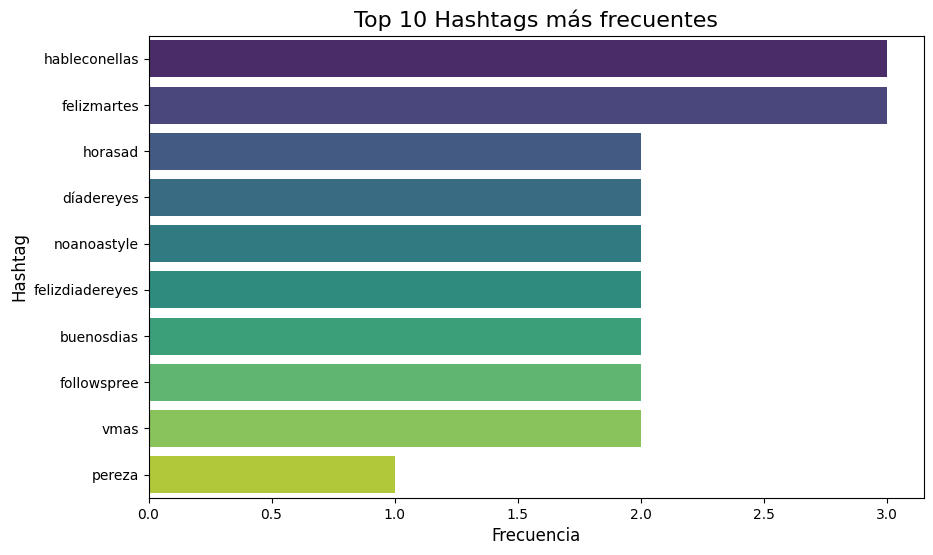

<ipython-input-34-1a4963d13489>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_mentions.values, y=top_mentions.index, palette='plasma')


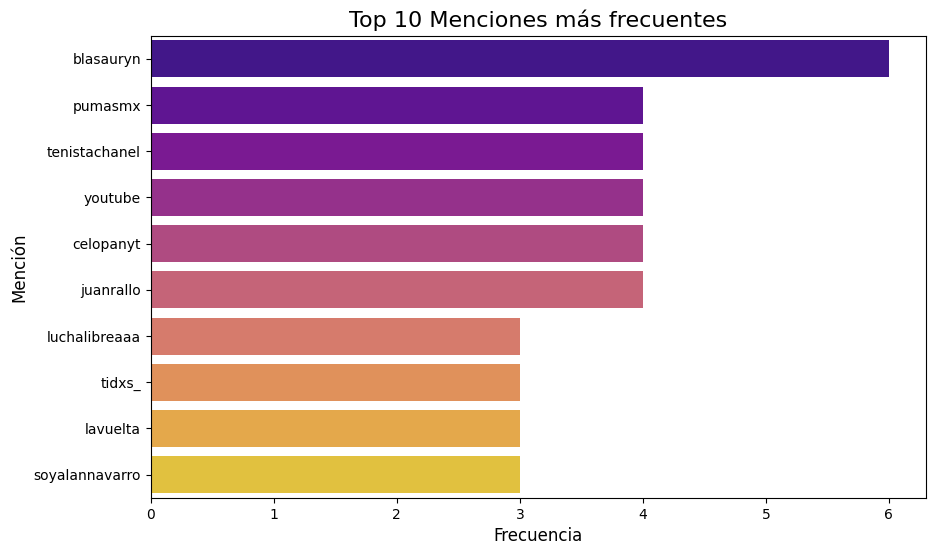

In [34]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Extraer hashtags
tweets['hashtags'] = tweets['Contents'].str.findall(r'#(\w+)')

# Extraer menciones
tweets['mentions'] = tweets['Contents'].str.findall(r'@(\w+)')

# Obtener los 10 hashtags más frecuentes
all_hashtags = [hashtag for sublist in tweets['hashtags'] for hashtag in sublist]
top_hashtags = pd.Series(all_hashtags).value_counts().head(10)

# Obtener las 10 menciones más frecuentes
all_mentions = [mention for sublist in tweets['mentions'] for mention in sublist]
top_mentions = pd.Series(all_mentions).value_counts().head(10)

# Graficar los hashtags más frecuentes
plt.figure(figsize=(10, 6))
sns.barplot(x=top_hashtags.values, y=top_hashtags.index, palette='viridis')
plt.title('Top 10 Hashtags más frecuentes', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Hashtag', fontsize=12)
plt.show()

# Graficar las menciones más frecuentes
plt.figure(figsize=(10, 6))
sns.barplot(x=top_mentions.values, y=top_mentions.index, palette='plasma')
plt.title('Top 10 Menciones más frecuentes', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Mención', fontsize=12)
plt.show()



## 6. Conclusiones

Responde brevemente:

* Dos insights sobre el **sesgo** lingüístico.  
* Un insight sobre el **sentimiento**.  
* Una recomendación de comunicación para la marca.


1. Insights sobre el sesgo linguístico:
- Algunos hashtags como #Violenciadegenero, #feminismo y #machismo pueden promover mensajes de odio o discriminación. Es crucial considerar el contexto de su uso en redes sociales.
- Los tweets biased utilizan vocabulario con connotaciones negativas hacia las mujeres, como fea o gorda, mientras que los non-biased emplean un lenguaje más general y neutral.

2. Insight sobre el sentimiento:
Los tweets sesgados muestran una polaridad negativa más acentuada, utilizando un lenguaje agresivo y despectivo, lo cual puede indicar sesgo y discriminación en la comunicación.

3. Recomendación a la marca:
La marca debe evitar el lenguaje estereotipado y discriminatorio, revisando el vocabulario y representaciones utilizadas, optando por un lenguaje inclusivo que promueva la igualdad de género.



